In [1]:
# Felipe Trinidad & Kieran Scanlon
# May 1, 2024

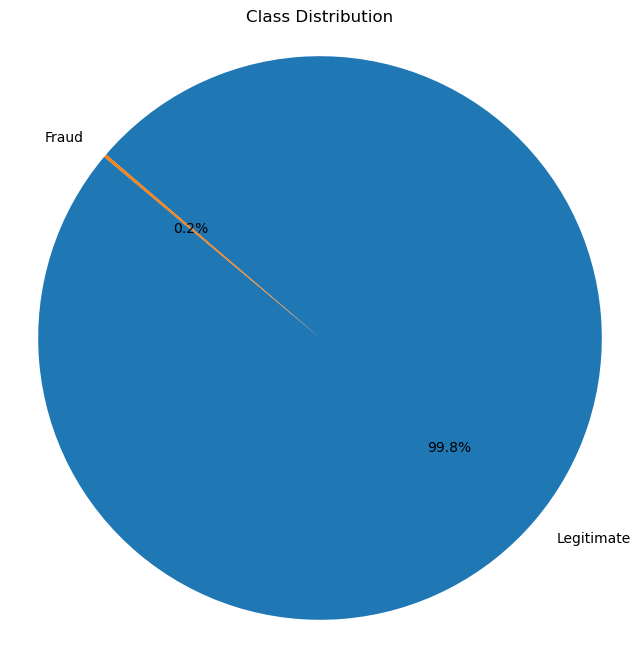

Class
0    284315
1       492
Name: count, dtype: int64


In [2]:
# Read Original CSV and plot in a pie chart to show imbalance

import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv('creditcard.csv')

# Check class distribution
class_distribution = df['Class'].value_counts()

# Custom labels for classes
custom_labels = ['Legitimate', 'Fraud']

# Display Unbalanced Classes in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

# Print Classes
class_distribution = df['Class'].value_counts()
print(class_distribution)


In [3]:
import pandas as pd

def get_largest_number_in_column(csv_file):
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(csv_file)
        # Extract the "Amount" column and find the maximum value
        max_value = df['Amount'].max()
        return max_value
    except FileNotFoundError:
        print("File not found.")

# Example usage:
csv_file = 'creditcard.csv'

largest_amount = get_largest_number_in_column(csv_file)
if largest_amount is not None:
    print("The largest amount is:", largest_amount)

The largest amount is: 25691.16


In [4]:
import pandas as pd

def get_smallest_number_in_column(csv_file):
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(csv_file)
        # Extract the "Amount" column and find the minimum value
        min_value = df['Amount'].min()
        return min_value
    except FileNotFoundError:
        print("File not found.")

# Example usage:
csv_file = 'creditcard.csv'  # Replace with the path to your CSV file

smallest_amount = get_smallest_number_in_column(csv_file)
if smallest_amount is not None:
    print("The smallest amount is:", smallest_amount)

The smallest amount is: 0.0


In [5]:
# Oversampling creditcard.csv

from imblearn.over_sampling import SMOTE

# Implement oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('Class', axis=1), df['Class'])

# Create a DataFrame for the oversampled data
oversampled_df = pd.DataFrame(X_resampled, columns=df.drop('Class', axis=1).columns)
oversampled_df['Class'] = y_resampled

# Shuffle the data to mix the original and synthetic samples
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataset
oversampled_df.to_csv('creditcard_oversampled_dataset.csv', index=False)

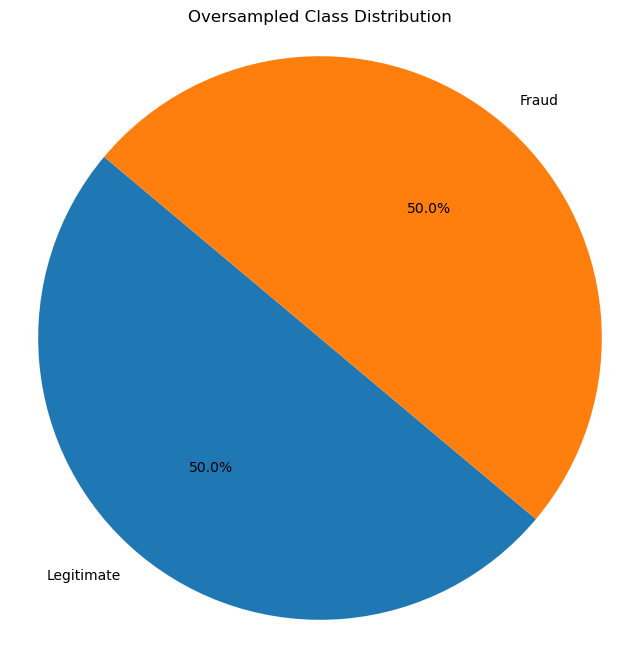

Class
1    284315
0    284315
Name: count, dtype: int64


In [6]:
# Plot oversampling through a pie chart

# Read oversampled CSV
df = pd.read_csv('creditcard_oversampled_dataset.csv')

# Check class distribution
class_distribution = df['Class'].value_counts()

# Custom labels for classes
custom_labels = ['Legitimate', 'Fraud']

# Display Balanced Classes in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Oversampled Class Distribution')
plt.axis('equal')
plt.show()

# Print Classes
class_distribution = df['Class'].value_counts()
print(class_distribution)

In [7]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Load CSV file
df = pd.read_csv('creditcard.csv')

# Create the RandomUnderSampler instance
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(df.drop('Class', axis=1), df['Class'])

# Create a DataFrame for the undersampled data
undersampled_df = pd.DataFrame(X_resampled, columns=df.drop('Class', axis=1).columns)
undersampled_df['Class'] = y_resampled

# Shuffle the data to mix the original and undersampled samples
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataset
undersampled_df.to_csv('creditcard_undersampled_dataset.csv', index=False)

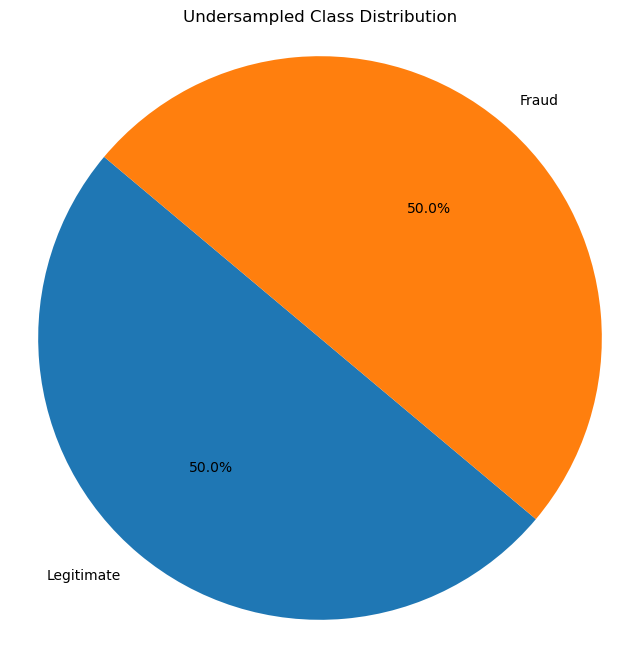

Class
1    492
0    492
Name: count, dtype: int64


In [8]:
# Read undersampled CSV
df = pd.read_csv('creditcard_undersampled_dataset.csv')

# Check class distribution
class_distribution = df['Class'].value_counts()

# Custom labels for classes
custom_labels = ['Legitimate', 'Fraud']

# Display Balanced Classes in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Undersampled Class Distribution')
plt.axis('equal')
plt.show()

# Print Classes
class_distribution = df['Class'].value_counts()
print(class_distribution)

In [9]:
# Using Nearest Neighbor with the Undersampled CSV

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load the CSV file into a DataFrame
df = pd.read_csv('creditcard_undersampled_dataset.csv')

# Preprocess the data

# Split the data into features (X) and the target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Accuracy: 0.6243654822335025
Precision: 0.5670103092783505
Recall: 0.632183908045977
F1 Score: 0.5978260869565217
AUC-ROC Score: 0.6251828631138976


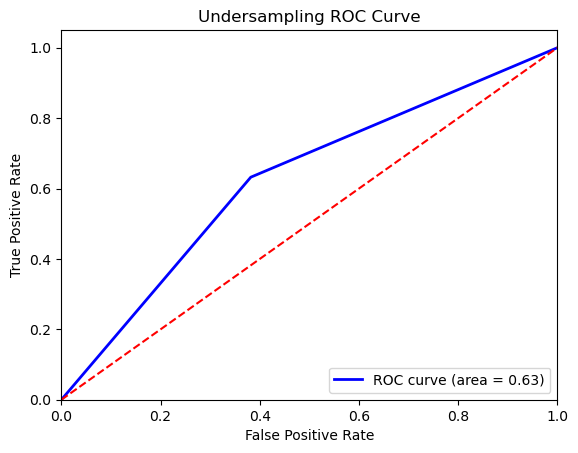

In [10]:
# Plot the ROC Curve for Undersampled CSV

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Undersampling ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
# Using Nearest Neighbor with the Oversampled CSV

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load the CSV file into a DataFrame
df = pd.read_csv('creditcard_oversampled_dataset.csv')

# Preprocess the data

# Split the data into features (X) and the target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = knn.predict(X_test)

# Evaluate the performance of the classifier
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Accuracy: 0.9625239610994847
Precision: 0.9483545520057651
Recall: 0.9778501167645602
F1 Score: 0.9628765047122974
AUC-ROC Score: 0.9626147895105625


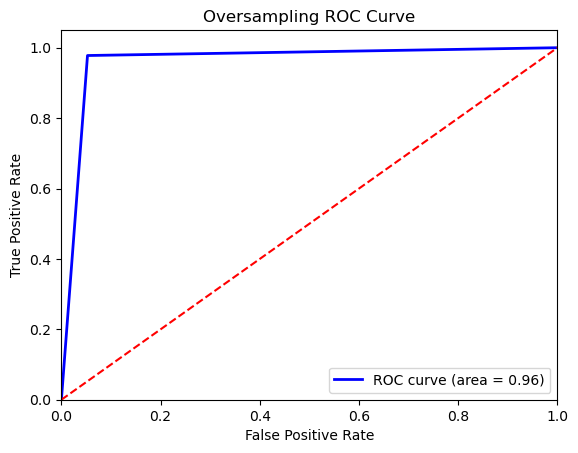

In [12]:
# Plot the ROC Curve for Oversampled CSV

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Oversampling ROC Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9984348346024656
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57202
           1       1.00      1.00      1.00     56524

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



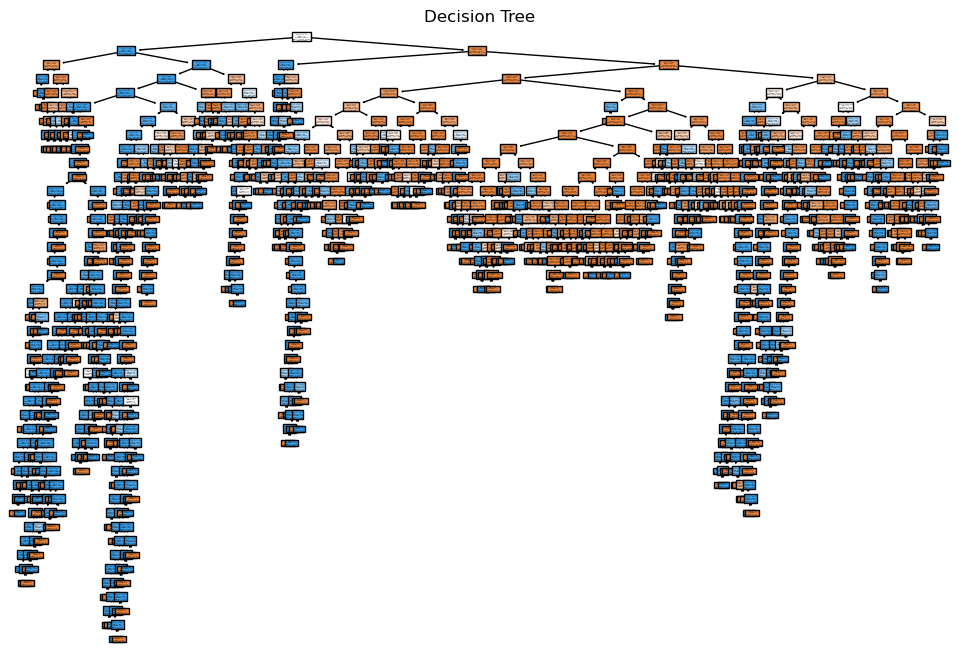

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, class_names=["Legitimate", "Fraud"], filled=True)
plt.title('Decision Tree')
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create logistic regression model with a maximum of 1000 iterations
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Now you can use the model to make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9760301074512424
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     57202
           1       0.98      0.97      0.98     56524

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



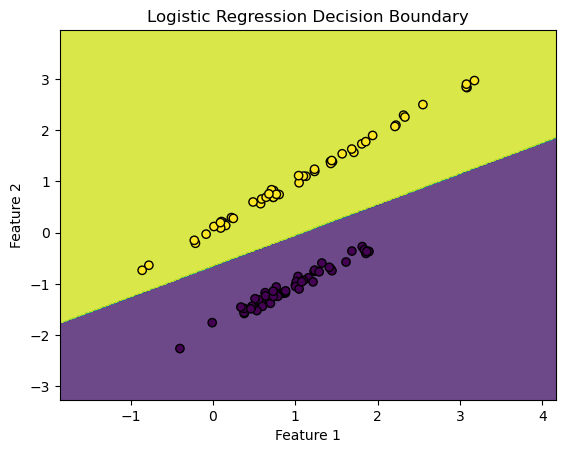

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

C:\Users\ftrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


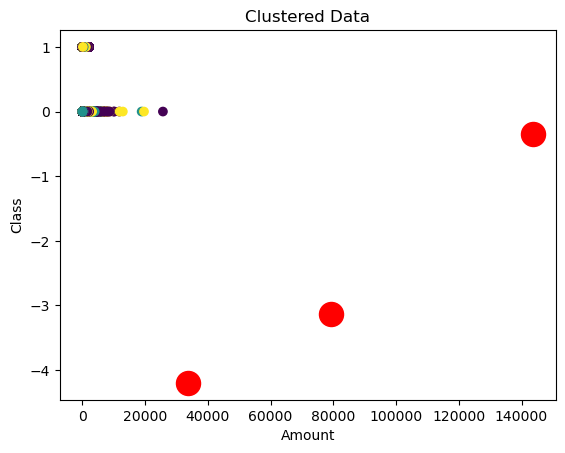

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('creditcard_oversampled_dataset.csv')

kmeans = KMeans(n_clusters=3)  # Change the number of clusters as needed
kmeans.fit(data)

plt.scatter(data['Amount'], data['Class'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Clustered Data')
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
data = pd.read_csv('creditcard_oversampled_dataset.csv')

# Step 2: Split the dataset into features (X) and target variable (y)
X = data.drop('Class', axis=1)  # Replace 'target_column_name' with the actual name of your target column
y = data['Class']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Step 6: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9999384485517824
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57202
           1       1.00      1.00      1.00     56524

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

